# Import The Libraries

In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [19]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


#hide
from fastbook import *
from fastai.vision.widgets import *

# Get The Data

In [21]:
search_images_ddg
ims = search_images_ddg('grizzly bear')
len(ims)

200

In [22]:
dest = 'images/grizzly.jpg'
download_url(ims[1], dest, show_progress=False)

Path('images/grizzly.jpg')

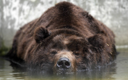

In [23]:
im = Image.open(dest)
im.to_thumb(128, 128)

In [29]:
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears2')

In [30]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o} bear')
        download_images(dest, urls=results)

In [31]:
fns = get_image_files(path)
fns

(#529) [Path('bears2/teddy/94882cde-f857-4ca7-a5db-2cb5e20fc87f.jpg'),Path('bears2/teddy/6479547c-7eb8-44e2-9a5a-0be7b9c996e8.jpg'),Path('bears2/teddy/5e1fa28e-a81b-4dff-9336-47d9f0f1a242.jpg'),Path('bears2/teddy/d6337796-4a78-4583-8385-6e0fc27e4533.jpg'),Path('bears2/teddy/fd021567-3c18-4642-836a-423d77ce9f55.jpg'),Path('bears2/teddy/acae2518-adc8-488c-84c6-594c68cfc958.jpg'),Path('bears2/teddy/023870b8-b1b8-4a9d-a037-4ba5d26b1c7c.jpg'),Path('bears2/teddy/58b50949-0793-433d-8473-0a441c6cfa56.png'),Path('bears2/teddy/825ea5d9-d5f8-4d23-b193-ce2fba881413.jpg'),Path('bears2/teddy/785b70ad-199a-43e3-94cc-9044b1558a4f.jpg'),Path('bears2/teddy/2c44923d-af9c-4730-bb30-387e0c940e14.jpg'),Path('bears2/teddy/ca9344f7-e350-485f-9059-083181218522.png'),Path('bears2/teddy/348e75ab-e481-4e94-a881-0d79015f8291.jpg'),Path('bears2/teddy/83b273be-df27-42a4-a978-a2e1acfde041.jpg'),Path('bears2/teddy/d6571654-e8c2-4ab2-9f5e-9890660c6321.png'),Path('bears2/teddy/ac862273-daef-4b67-bc69-3e067c4c16e2.jpg'),

In [32]:
failed = verify_images(fns)
failed

(#26) [Path('bears2/teddy/348e75ab-e481-4e94-a881-0d79015f8291.jpg'),Path('bears2/teddy/a7e1befc-d2c1-41ec-98a7-43e250019b10.jpg'),Path('bears2/teddy/35835b2c-9b07-4812-8bb0-a93572316221.jpg'),Path('bears2/teddy/e709368b-da42-4755-b16a-1c5a9e3852cf.png'),Path('bears2/teddy/7cf4ea86-ff77-49de-ad76-99bc35a6506e.jpg'),Path('bears2/teddy/b4a7e251-a925-430b-96e0-ba459ef1961d.jpg'),Path('bears2/teddy/85e2c412-9208-4116-9b8e-5f011cba26e1.jpg'),Path('bears2/black/8a3f17fe-c654-4b2d-aa94-cd50e442b2bb.JPG'),Path('bears2/black/5143b8a6-dd00-4c2c-b455-fc3d3ef3e623.jpg'),Path('bears2/black/3c1f7c7e-aa30-4568-8394-fcc43ea6cc36.jpg'),Path('bears2/black/a0723b9e-7eba-41ef-9abc-8e7a53429328.jpg'),Path('bears2/black/11c23b51-5bff-4a48-b5b6-45f1f380b923.jpg'),Path('bears2/black/f02577e2-9ec3-49bd-86ab-1a44396610ed.jpg'),Path('bears2/black/0eb408f7-8814-45a7-8998-6aa8e71e8532.jpg'),Path('bears2/black/066eb761-a8cc-4e81-ae6c-73dbe121c266.jpg'),Path('bears2/black/b1bf5d5e-e5fb-43f6-9da8-7f56aac362e8.JPG'),P

In [33]:
failed.map(Path.unlink)

(#26) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

# Sidebar: How get help in Jupyter Notebooks

In [34]:
??verify_images

Signature: verify_images(fns)
Source:   
def verify_images(fns):
    "Find images in `fns` that can't be opened"
    return L(fns[i] for i,o in enumerate(parallel(verify_image, fns)) if not o)
File:      /usr/local/lib/python3.10/dist-packages/fastai/vision/utils.py
Type:      function


or

In [35]:
?verify_images

Signature: verify_images(fns)
Docstring: Find images in `fns` that can't be opened
File:      /usr/local/lib/python3.10/dist-packages/fastai/vision/utils.py
Type:      function


# From Data to Dataloaders

In [36]:
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label, # Gets the name of the folder a file is in
    item_tfms = Resize(128)
)

In [37]:
dls = bears.dataloaders(path)

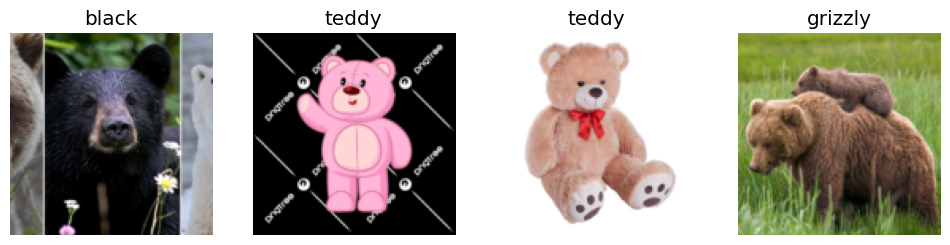

In [38]:
dls.valid.show_batch(max_n=4, nrows=1)

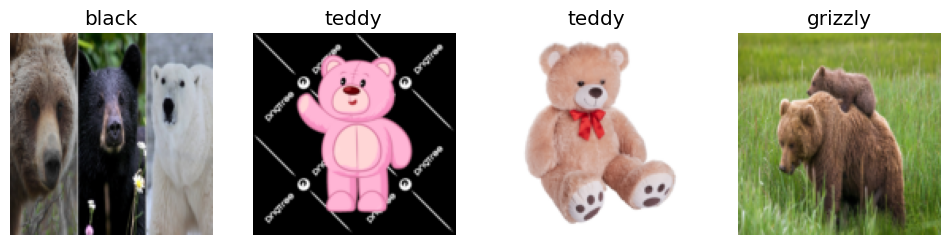

In [39]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

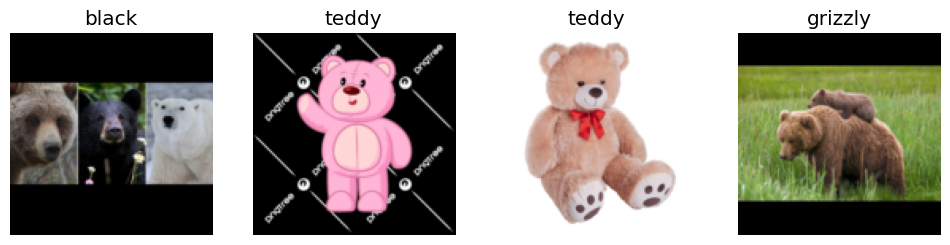

In [40]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

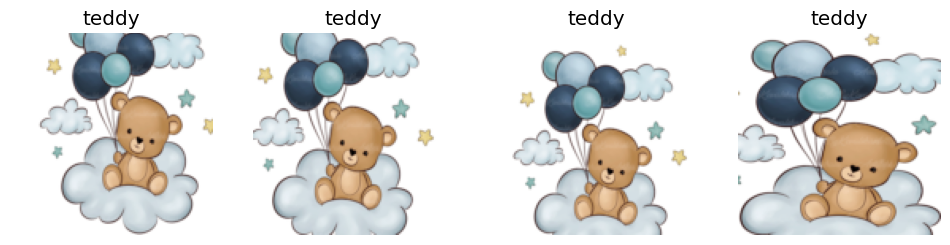

In [43]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique = True)

# Data Augmentation

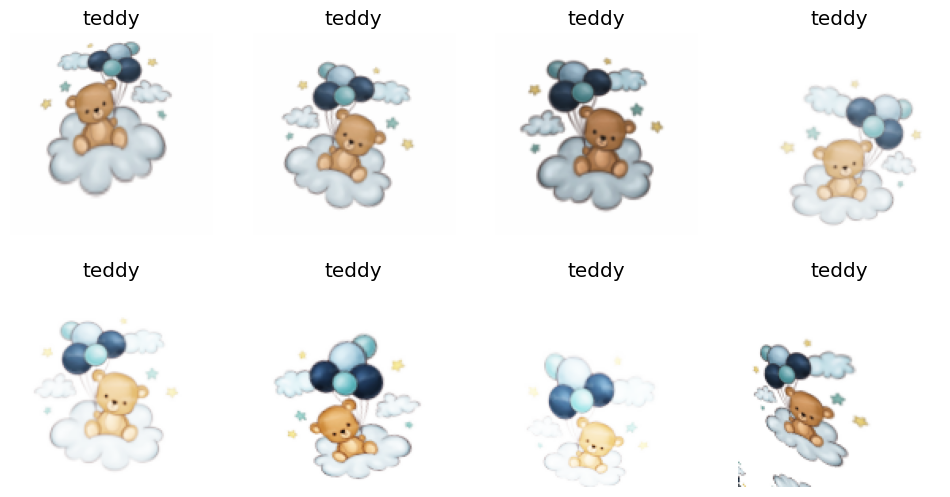

In [45]:
bears = bears.new(item_tfms = Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique = True)

# Training Your Model, and Using It to Clean Your Data

In [46]:
bears = bears.new(
    item_tfms = RandomResizedCrop(224, min_scale=0.5),
    batch_tfms = aug_transforms()
)

dls = bears.dataloaders(path)

In [48]:
learn = vision_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 119MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.393797,0.303340,0.080000,01:45


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.333452,0.333561,0.070000,02:13
1,0.248826,0.291992,0.060000,02:19
2,0.195098,0.283159,0.050000,02:15
3,0.169721,0.280425,0.060000,02:13


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


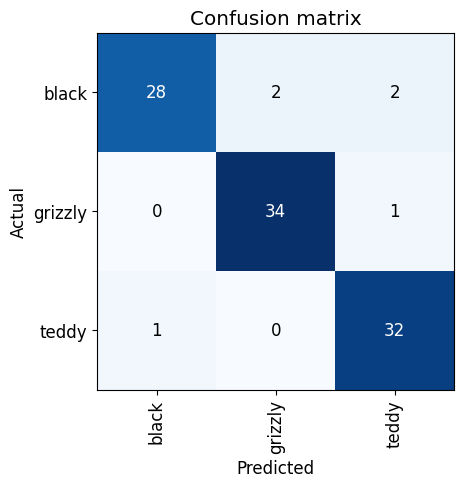

In [50]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

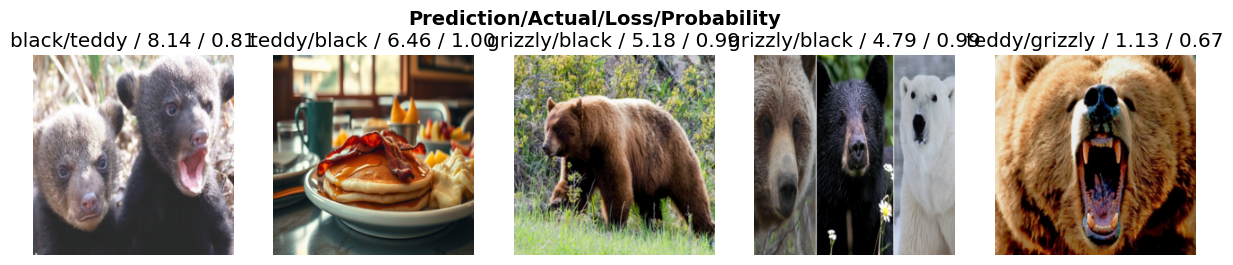

In [51]:
interp.plot_top_losses(5, nrows=1)

In [52]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
